<a href="https://colab.research.google.com/github/jej0312/DM_TA/blob/main/4_CBR(knn)_AR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CBR(Case-based reasoning) & AR(Association Rules)
- TA: 전은지 (Eunji Jeon)  
- Dept. of Industrial Engineering, Yonsei Univ (Industrial Statistics Lab; ISL 산업통계연구실)
- 문의: `jej_0312_@naver.com`

# 1. CBR (사례기반 추론)
- 새로운 문제가 주어질 때 과거의 유사한 문제해결 사례를 기반으로 그 해법을 적절히 변용함으로써 새로운 문제에 적합한 해결책을 효율적으로 도출하고자 하는 문제해결 방법
  - 사례기반 추론: 귀납법적 접근법으로 많은 사례로 부터 일반화하는 방식
  - 규칙기반 추론(rule based reasoning): 연역법적 접근법으로 일반화된 규칙을 만든 다음 새로운 문제상황이 주어지면 그 결과를 예측하는 방식

- 특징
  - 제대로  정의되지  않은  비정형  정보를  쉽게  표현할 수  있으며,  지식의  추가가  쉬움
  - 시간에 대해 동적인 변화를 나타내는 영역에 적용하는 것이 이상적
  - 별도의 학습 과정 없이 즉시 모델이 갱신될 수 있기 때문에 실시간으로 일어나는 사건에 적용 가능
- 한계
  - 사례의 연관성이 탐색되지 않을 경우 추천이 불가능
  - 단순한 구매패턴에 의존한 방식으로, 고객의 특성을 고려할 수 없음
  - 우수한 예측 결과를 도출해내기 위해서는 경험과 직관에 의존한 휴리스틱(heuristic)에 의해 설정되어야 함
- [참고1](https://www.dbpia.co.kr/pdf/pdfView.do?nodeId=NODE01699006&mark=0&useDate=&ipRange=N&accessgl=Y&language=ko_KR&hasTopBanner=true), [참고2](https://koasas.kaist.ac.kr/bitstream/10203/22375/1/12903.pdf)

## Nearest Neighbor (근접이웃방법론)
- 사례기반추론을 이용하기 위해서는 과거의 사례와 사례들 사이의 유사 정도를 측정하기 위한 유사도 척도가 필요
- 일반적으로 nearest neighbor 방식이 많이 사용 (e.g. K-NN (K-Nearest Neighbor; K 최근접 이웃))
- k개의 가장 가까운 이웃을 선택한 다음 이러한 이웃을 기반으로 클래스를 할당하거나(분류 문제의 경우) 새 관찰에 대한 값(회귀 문제의 경우)을 예측

- 장점
  - 결과 해석의 용이성
  - 거리 계산이 가능한 모든 데이터에 활용 가능
  - outlier에 robust (주변 K만을 기반으로 classify)
  - 통계 가정 필요 없이 단순하게 잘 작동
- 한계
  - 거리를 다 계산해야하기 때문에 계산 issue

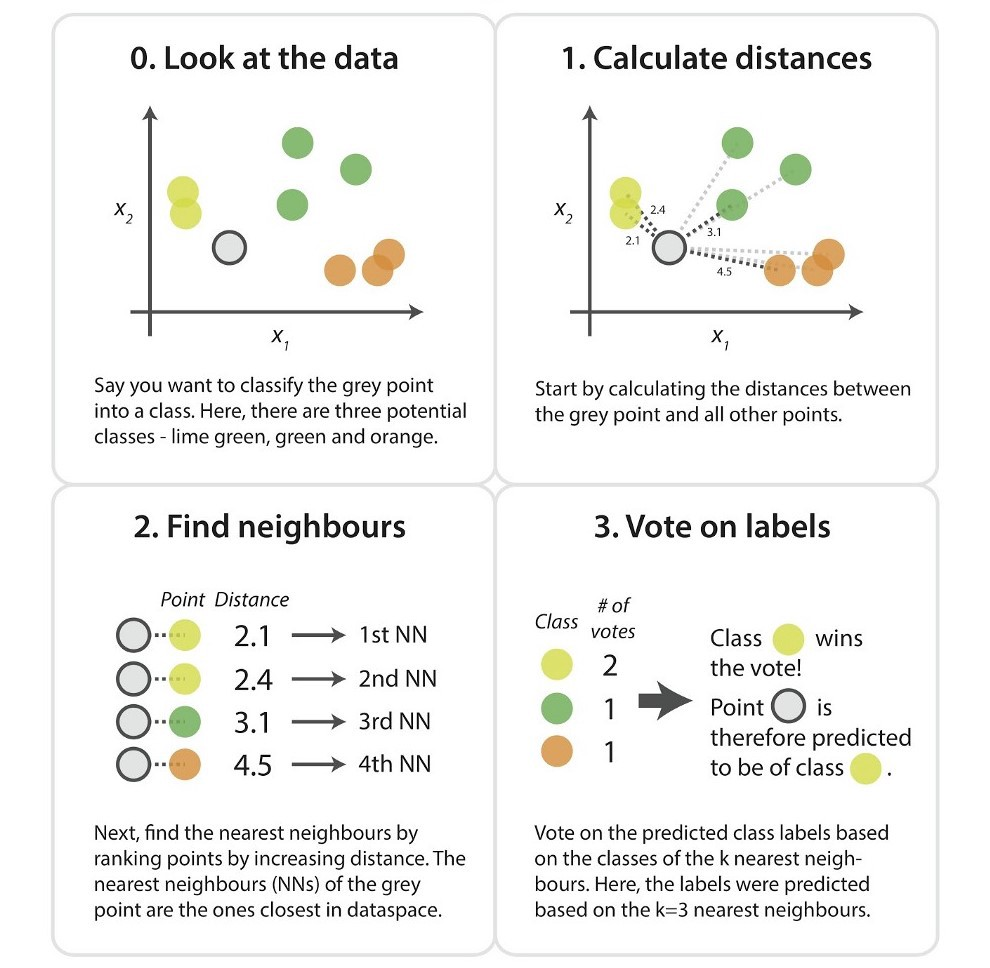
- [출처](https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb)

## Case 1: categorical target (classification)

### Step 1. Dataset preprocessing

In [36]:
from sklearn.datasets import load_breast_cancer
breast_cancer_data = load_breast_cancer() # sklearn에 존재하는 유방암 data 사용

In [37]:
print("불러온 dataset의 키: \n{}".format(breast_cancer_data.keys()))

불러온 dataset의 키: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [38]:
print(breast_cancer_data['DESCR'] + "\n...")

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [39]:
import pandas as pd
x = pd.DataFrame(breast_cancer_data.data)
y = pd.DataFrame(breast_cancer_data.target)

In [40]:
x.columns = breast_cancer_data.feature_names
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [41]:
y.columns = ['target_y'] # y column명 변경
y.head()

,target_y
0,0
1,0
2,0
3,0
4,0


- Y값의 분포가 unbalanced한 데이터셋
  - 0: 'malignant 악성' (212명)
  - 1: 'benign 양성' (357명)

In [42]:
print(breast_cancer_data.target_names)
print(y['target_y'].value_counts()) 

['malignant' 'benign']
1    357
0    212
Name: target_y, dtype: int64


In [43]:
x.describe() # 독립변수(feature)의 기초통계량

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


- 관측치들 간 유사성을 측정할 때 변수의 크기에 영향을 받지 않도록 scaling 진행 ([예시](https://stats.stackexchange.com/questions/287425/why-do-you-need-to-scale-data-in-knn))

In [44]:
# Z-score Standardization
from sklearn.preprocessing import StandardScaler
scaled_x = pd.DataFrame(StandardScaler().fit_transform(x), columns=x.columns, index = x.index)

In [45]:
scaled_x.describe() # 표준화 이후, 독립변수(feature)의 기초통계량

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-3.162867e-15,-6.530609e-15,-7.078891e-16,-8.799835e-16,6.132177e-15,-1.120369e-15,-4.421380e-16,9.732500e-16,-1.971670e-15,-1.453631e-15,...,-2.333224e-15,1.763674e-15,-1.198026e-15,5.049661e-16,-5.213170e-15,-2.174788e-15,6.856456e-16,-1.412656e-16,-2.289567e-15,2.575171e-15
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


### Step 2. Train test split
- 적절한 k값 선택을 위해 train, valid, test set으로 구분

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_x, y, test_size = 0.2, random_state = 312, stratify=y)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.2, random_state = 312, stratify=y_train)

In [47]:
print("train set:",x_train.shape)
print("valid set:",x_valid.shape)
print("test set:",x_test.shape)

train set: (364, 30)
valid set: (91, 30)
test set: (114, 30)


In [48]:
y_train.value_counts()

target_y
1           228
0           136
dtype: int64

### Step 3. Sampling
- 본 실습에서는 랜덤 언더 샘플링을 진행하여 비중을 맞춰주고자 함

In [49]:
from imblearn.under_sampling import RandomUnderSampler
X_resampled, y_resampled = RandomUnderSampler(random_state=312, sampling_strategy='majority').fit_resample(x_train, y_train)

In [50]:
print(y_resampled['target_y'].value_counts())

0    136
1    136
Name: target_y, dtype: int64


### Step 4. KNN classification
- `sklearn.neighbors`의 [`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)을 사용
- 가중치 부여 (weights)
  - uniform: 동일한 가중치를 부여하는 방법으로, 단순 평균을 사용
  - distance: 거리가 가까운 이웃의 영향을 더 많이 받도록 설정
- 계산 알고리즘 (algorithm)
  - auto: the most appropriate algorithm based on the values passed to fit method
  - ball_tree: [BallTree](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.BallTree.html#sklearn.neighbors.BallTree)
  - kd_tree: [KDTree](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KDTree.html#sklearn.neighbors.KDTree)
  - brute: brute-force search (sparse input의 경우 권장)
- 거리 계산의 척도 [(metric)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.DistanceMetric.html#sklearn.metrics.DistanceMetric)  


|identifier|distance|args|distance function|
|:--------:|:------:|:--:|:---------------:|
|euclidean|EuclideanDistance||sqrt(sum((x - y)^2))|
|manhattan|ManhattanDistance||sum(\|x - y\|)|
|chebyshev|ChebyshevDistance||max(\|x - y\|)|
|minkowski|MinkowskiDistance|p, w|sum(w *\|x - y\|^p)^(1/p)|
|wminkowski|WMinkowskiDistance|p, w|sum(\|w * (x - y)\|^p)^(1/p)|
|seuclidean|SEuclideanDistance|V|sqrt(sum((x - y)^2 / V))|
|mahalanobis|MahalanobisDistance|V or VI|sqrt((x - y)' V^-1 (x - y))|

- 유클리드 거리: 모든 attribute에 대해 동일한 가중치를 두고 거리를 측정
- 마할라노비스 거리: 상관관계에 따라 거리를 조정하기 위하여 공분산 행렬을 사용  
  - euclidean 거리는 마할라노비스 거리에서 correlation이 0인 특수한 경우
  - 자세한 설명은 [여기](https://www.reddit.com/r/AskStatistics/comments/9sdofc/mahalanobis_distance_vs_euclidean_distance/)에서 확인 가능

- iteration을 반복할 때마다 distance metric을 업데이트하는 것은 계산 비용이 많이 듦 (KNN: lazy learning algorithm)
- best K값을 선택하는 통계적 방법은 없으므로, 각 K에 따른 오류율을 비교하여 K 선택
  - K 값을 작게 선택하면 결정 경계가 불안정해질 수 있음
  - 큰 K 값은 결정 경계를 부드럽게 하기 때문에 분류에 더 좋을 수 있음


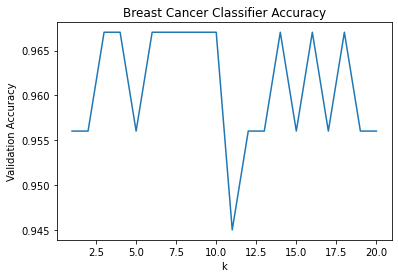

In [51]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

'''
k를 변화시켜가며 더 적합한 k를 찾기 위해 plot을 통해 accuracy를 확인
'''

k_list = range(1,21) # k= 1~20까지 조절
accuracies = []
best_k = 0
best_acc = 0
for k in k_list:
    classifier = KNeighborsClassifier(n_neighbors = k, weights="distance", metric="euclidean")
    classifier.fit(X_resampled, y_resampled['target_y'])
    acc = classifier.score(x_valid, y_valid)
    accuracies.append(acc)
    if best_acc < acc:
        best_acc = acc
        best_k = k
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Breast Cancer Classifier Accuracy")
plt.show()

In [52]:
classifier = KNeighborsClassifier(n_neighbors = best_k, weights="distance", metric="euclidean")
classifier.fit(X_resampled, y_resampled['target_y'])

KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')

In [53]:
print(classifier.score(x_test, y_test)) # accuracy

0.9736842105263158


### Step 5. Evaluation
- target이 categorical 변수이므로 confusion matrix를 사용하여 모델의 성능 비교  
- Confusion matrix (오차 행렬): training을 통한 prediction 성능을 측정하기 위해 예측 value와 실제 value를 비교하기 위한 표
  - **accuracy** (정확도): 전체 중 모델이 바르게 분류한 비율. $Accuracy=\frac{TP+TN}{TP+FN+FP+TN}$
  - **precision** (정밀도): 모델이 Positive라 분류한 것 중 실제값이 Positive인 비율. $Precision=\frac{TP}{TP+FP}$
  - **recall** (재현도): 실제값이 Positive인 것 중 모델이 Positive라 분류한 비율. $Recall=\frac{TP}{TP+FN}$
  - **f-beta**: Precision과 Recall의 조화평균. $F_{\beta}=(1+\beta^2)\cdot\frac{precision \cdot recall}{(\beta^2 \cdot precision)+recall}$
    - precision과 recall에 얼마나 가중치를 줄지에 따라 적절한 beta 값 선택
    - beta=1인 경우 **F1 score**
    - 데이터가 불균형한 경우 Accuracy가 아닌 F1 Score를 사용하여 평가
    - 다중 class의 경우 다음과 같이 계산 ([참고](https://leedakyeong.tistory.com/entry/%EB%B6%84%EB%A5%98-%EB%AA%A8%EB%8D%B8-%EC%84%B1%EB%8A%A5-%ED%8F%89%EA%B0%80-%EC%A7%80%ED%91%9C-Confusion-Matrix%EB%9E%80-%EC%A0%95%ED%99%95%EB%8F%84Accuracy-%EC%A0%95%EB%B0%80%EB%8F%84Precision-%EC%9E%AC%ED%98%84%EB%8F%84Recall-F1-Score))

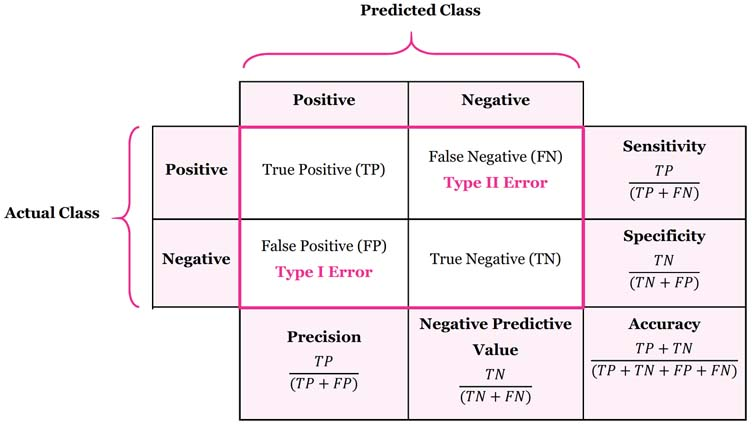

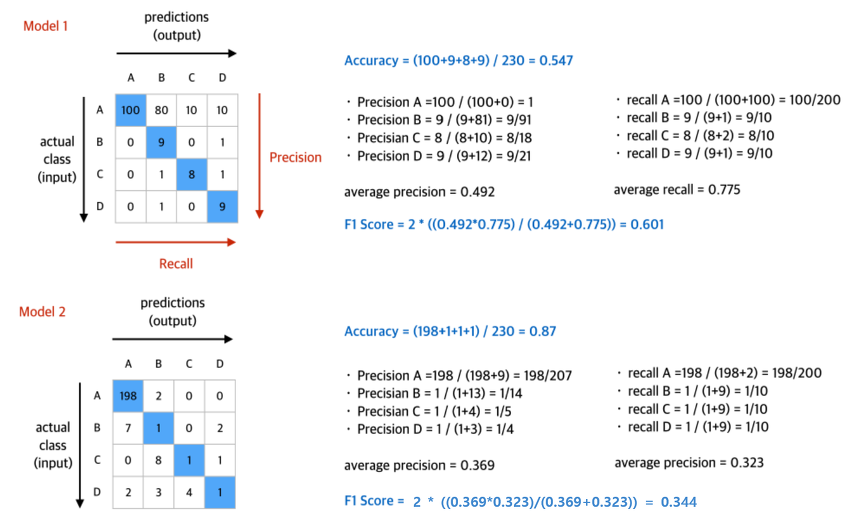

[[39  3]
 [ 0 72]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix')

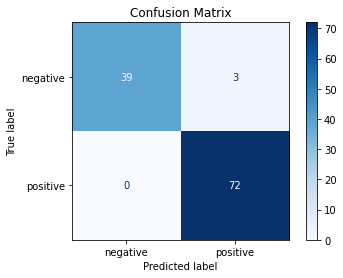

In [54]:
# Confusion Matrix
# 기준: y=0: Negative, y=1: Positive

#          예측값
# 실제값  TN   FP
#         FN   TP

from sklearn.metrics import confusion_matrix, plot_confusion_matrix
y_pred = classifier.predict(x_test)
print(confusion_matrix(y_test, y_pred))

import matplotlib.pyplot as plt
from matplotlib import cm

plot = plot_confusion_matrix(classifier, # 분류 모델
                             x_test, y_test, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=['negative', 'positive'], # 표에 표시할 labels
                             cmap=cm.Blues, # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize=None) # 'true', 'pred', 'all' 중에서 지정 가능. default=None
plot.ax_.set_title('Confusion Matrix')

In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("   Recall:", recall_score(y_test, y_pred))
print(" F1 score:", f1_score(y_test, y_pred))

 Accuracy: 0.9736842105263158
Precision: 0.96
   Recall: 1.0
 F1 score: 0.9795918367346939


## Case 2: continuous target (regression)

### Step 1. Dataset preprocessing

In [56]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/jej0312/DM_TA/main/data/dm_ex2.csv') ## 데이터 불러오기
df.head()

,education,income,women,prestige,census
0,13.11,12351,11.16,68.8,1113
1,12.26,25879,4.02,69.1,1130
2,12.77,9271,15.70,63.4,1171
3,11.42,8865,9.11,56.8,1175
4,14.62,8403,11.68,73.5,2111


In [57]:
from sklearn.model_selection import train_test_split
x = df[["education", "income", "women", "prestige"]]
y = df[["census"]]

In [58]:
# Z-score standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_std = scaler.fit_transform(x)

### Step 2. Train test split

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size = 0.2, random_state = 312)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.2, random_state = 312)

In [61]:
print("train set:",x_train.shape)
print("valid set:",x_valid.shape)
print("test set:",x_test.shape)

train set: (64, 4)
valid set: (17, 4)
test set: (21, 4)


### Step 3. KNN regression

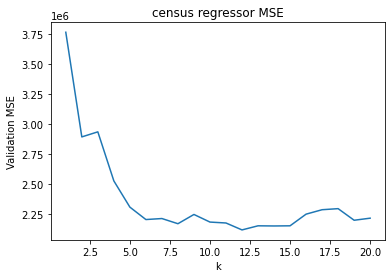

In [73]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

'''
k를 변화시켜가며 더 적합한 k를 찾기 위해 plot을 통해 accuracy를 확인
'''

best_mse = 1000000000
k_list = range(1,21) # k= 1~20까지 조절
mses = []
for k in k_list:
  regressor_k = KNeighborsRegressor(n_neighbors = k, weights = "distance")
  regressor_k.fit(x_train, y_train)
  mse = mean_squared_error(y_valid, regressor_k.predict(x_valid))
  mses.append(mse)
  if best_mse > mse:
    best_mse = mse
    best_k = k
plt.plot(k_list, mses)
plt.xlabel("k")
plt.ylabel("Validation MSE")
plt.title("census regressor MSE")
plt.show()

In [74]:
regressor = KNeighborsRegressor(n_neighbors = best_k, weights = "distance")

In [75]:
regressor.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=12, weights='distance')

In [76]:
pred_y = regressor.predict(x_test)
pred_y[:5]

array([[5415.16440204],
       [7487.93491454],
       [8467.42150206],
       [4064.19134071],
       [5942.34005372]])

### Step 4. Evaluation

- MSE (mean squared error): $\frac{1}{n}\sum_{i=1}^n{(y_i-\hat{y}_i)}^2$
  - 예측값과 실제값의 차이(오차)의 제곱 평균
  - 통계적 추정의 정확성에 대한 질적 척도
  - 제곱을 하기 때문에 아웃라이어에 민감
  - 오차값에 제곱을 취하기 때문에 (1) 오차가 0과 1 사이인 경우에, MSE에서 그 오차는 본래보다 더 작게 반영되고, (2) 오차가 1보다 클 때는 본래보다 더 크게 반영
- RMSE (root MSE): $\sqrt{\frac{1}{n}\sum_{i=1}^n{(y_i-\hat{y}_i)}^2}$
  - MSE에 루트를 취하여 MSE의 단점을 어느 정도 해소
  - MSE를 실제값과 유사한 단위로 변환하여 해석이 용이해짐
- MAE (mean absolute error): $\frac{1}{n}\sum_{i=1}^n{(|y_i-\hat{y}_i|)}$
  - 오차의 절댓값 평균
  - 아웃라이어에 보다 robust함
  - 모든 오차에 동일한 가중치를 부여
- MAPE (mean absolute percentage error): $\frac{100}{n}\sum_{i=1}^n{|\frac{y_i-\hat{y}_i}{y_i}|}$
  - MAE를 퍼센트 값으로 나타냄 (0~100)
  - 성능에 대해 이해하기 쉬움
- 어떤 경우에는 이상치를 무시하여 일반화할 필요가 있고 (=>MAE), 이상치도 고려하여 일반화(=>MSE)할 필요가 있음.
  - 모델 학습 시 이상치에 가중치를 부여하고자 한다면, MSE에 루트를 씌운 RMSE를 채택할 수 있음
- [참고1](https://steadiness-193.tistory.com/277), [참고2](https://jysden.medium.com/%EC%96%B8%EC%A0%9C-mse-mae-rmse%EB%A5%BC-%EC%82%AC%EC%9A%A9%ED%95%98%EB%8A%94%EA%B0%80-c473bd831c62), [참고3](https://acdongpgm.tistory.com/102)

In [77]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
print("MSE :", mean_squared_error(y_test, pred_y))
print("RMSE:", mean_squared_error(y_test, pred_y, squared=False))
print("MAE :", mean_absolute_error(y_test, pred_y))
print("MAPE:", mean_absolute_percentage_error(y_test, pred_y))

MSE : 2478046.1469242
RMSE: 1574.1811035977405
MAE : 1101.5063451851938
MAPE: 0.3050032784276157


# AR (Association Rules; 연관규칙)

- **연관규칙분석, 장바구니분석** (Association Rule Analysis, Market Basket Analysis)
  - 비지도학습
  - 고객의 대규모 거래 데이터(트랜잭션)로부터 함께 구매가 발생하는 규칙(예: A -> B)을 도출하여, 고객이 특정 상품 구매 시 이와 연관성 높은 상품을 추천  
  - 거래(transaction)와 항목(item)으로 구성되어 있는 경우  
  - 상품 간의 관련성(방향성)을 고려할 수 있음 => 키워드 간의 관계를 고려하는 데에도 사용 (예를 들어, 관련 연구는 [여기1](http://dx.doi.org/10.5859/KAIS.2021.30.1.123), [여기2](https://www.koreascience.or.kr/article/JAKO201125736640964.pdf), [여기3](https://doi.org/10.14383/SIME.2016.24.4.101)를 참고) 

* v.s. Collaborative Filtering: 모든 고객의 상품 구매 이력을 수치화하고, 추천 대상이 되는 고객 A와 다른 고객 B에 대해 상관계수를 비교해서, 서로 높은 상관이 인정되는 경우 고객 B가 구입 완료한 상품 중에 고객 A가 미구입한 상품을 고객 A에게 추천
  - 유저(user)와 항목(item)으로 구성되어 있는 경우  

- [참고](https://hezzong.tistory.com/23)

- 방법
  - Join based: 최소 support threshold 이상인 경우 더 큰 itemset으로 확장
    - Apriori: breadth-first search로 계산이 expensive
  - Tree based: depth-first order을 통해 itemsets를 탐색
  - Pattern growth: 현재 frequent patterns에 기반하여 확장
    - FP-growth: depth-first search로, apriori에 비해 속도가 빠르며 메모리 효율적 사용
- [Apriori v.s. FP-Growth](https://analyticsindiamag.com/apriori-vs-fp-growth-in-market-basket-analysis-a-comparative-guide/)

- 장점
  - 분석을 위한 복잡한 가정이 필요하지 않으므로 사전 지식이 부족해도 다양한 패턴을 도출 가능
  - 다양한 목적에 맞게 분석을 응용하여 쓸 수 있기 때문에 여러 도메인에서 활용됨

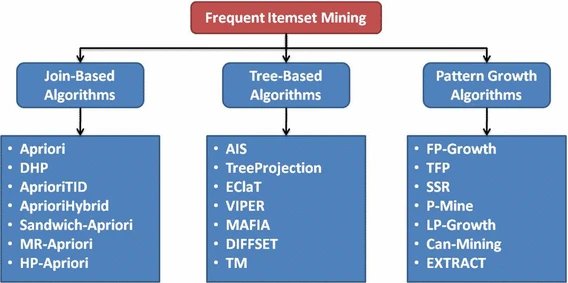

## Step 1. Import the necessary libraries
- `mlxtend`: Machine learning extensions. Machine learning에 사용하는 알고리즘들을 제공하는 파이썬 라이브러리로, 연관규칙 분석 시 사용하는 함수도 포함. 자세한 내용은 [다음](http://rasbt.github.io/mlxtend/)에서 확인 가능.

In [78]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

## Step 2. Import the dataset
- dataset: Chipotle.tsv from [Kaggle](https://www.kaggle.com/navneethc/chipotle)

In [79]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/jej0312/DM_TA/main/data/chipotle.tsv", delimiter='\t', header=0)

In [80]:
df.head() # 각 order의 내용 (item)에 대한 dataframe

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


## Step 3. Preprocess the dataset to appropriate form for association rule mining
- `mlxtend`에서 제공하는 [`TransactionEncoder`](http://rasbt.github.io/mlxtend/user_guide/preprocessing/TransactionEncoder/)을 사용하여 list 형식으로 구성된 거래 데이터를 2차원 numpy array로 변경  

In [82]:
'''
1) orders로 이루어진 DataFrame을 nested list (장바구니) 형태로 변경
   - order_id가 동일한 item_name을 하나의 리스트로 묶음
   - 이 때, apriori 알고리즘의 정의에 의해, 중복된 연관 규칙은 제거할 필요가 있음
'''

df_tmp = df.groupby('order_id')['item_name'].apply(set).apply(list).to_list()
print(df_tmp[:10])

[['Nantucket Nectar', 'Chips and Tomatillo-Green Chili Salsa', 'Izze', 'Chips and Fresh Tomato Salsa'], ['Chicken Bowl'], ['Side of Chips', 'Chicken Bowl'], ['Steak Burrito', 'Steak Soft Tacos'], ['Steak Burrito', 'Chips and Guacamole'], ['Chicken Crispy Tacos', 'Chicken Soft Tacos'], ['Chicken Bowl', 'Chips and Guacamole'], ['Chicken Burrito', 'Chips and Tomatillo-Green Chili Salsa'], ['Chicken Burrito', 'Canned Soda'], ['Chicken Bowl', 'Chips and Guacamole']]


In [83]:
'''
2) nested list (장바구니)를 association rule을 찾기 위한 dataframe의 형태로 변경
  - Via the fit method, the TransactionEncoder learns the unique labels in the dataset, and via the transform method, it transforms the input dataset (a Python list of lists) into a one-hot encoded NumPy boolean array
'''
te = TransactionEncoder()
te_ary = te.fit_transform(df_tmp) # df_tmp를 장바구니 형태로 변경 (fit과 transform을 동시에 진행)
print(te_ary)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [85]:
df = pd.DataFrame(te_ary, columns=te.columns_) # label 정보는 te.columns_에 저장되어 있으므로, 해당 값을 칼럼명으로 하는 데이터 프레임으로 변경.
df.head()

,6 Pack Soft Drink,Barbacoa Bowl,Barbacoa Burrito,Barbacoa Crispy Tacos,Barbacoa Salad Bowl,Barbacoa Soft Tacos,Bottled Water,Bowl,Burrito,Canned Soda,...,Steak Crispy Tacos,Steak Salad,Steak Salad Bowl,Steak Soft Tacos,Veggie Bowl,Veggie Burrito,Veggie Crispy Tacos,Veggie Salad,Veggie Salad Bowl,Veggie Soft Tacos
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Step 4. Association rule mining
- 연관분석 함수(`apriori, association_rules`)를 사용하여 분석 진행  
  - 지지도(support): 범용성 0.1
    - rule의 조건이 일어날 확률
    - 전체 중에서 상품 A가 몇 번이나 판매되었는가  
  $s(X→Y)=P(X \cap Y)$  

  - 신뢰도(confidence) 0.7
    - rule의 조건이 일어났을 때, 결과가 발생할 확률
    - A를 구입한 주문 중 B도 동시에 구입한 주문 수  
  $c(X → Y)=\frac{P(X \cap Y)}{P(X)}=P(B|A)$  

  - 향상도(lift) 
    - 조건과 결과가 각각 독립적이라고 가정할 경우보다 얼마나 더 좋은지를 평가
    - 두 상품의 관계를 직접적으로 나타낸 것  
   $Lift(X, Y)=\frac{P(A \cap B)}{P(A) \times P(B)}=\frac{P(B|A)}{P(B)}$  
    - X가 기본 아이템일 경우 항상 confidence가 1이 나오는 경우 두 아이템 간 관계를 파악할 수 없으므로 향상도를 비교

- 일반적으로 association rule을 사용하여 분석할 때는 다음과 같은 과정을 거침  
    1) 특정 지지도 이상인 set을 찾음  
    2) 해당 set의 조합으로 만들 수 있는 rule 중 신뢰도 이하의 rule을 screening out   
    3) 향상도를 정렬하여 rule을 평가

- 해석 시 유의할 점
  - item의 선/후 혹은 인과 관계는 알 수 없음
  - item별 수량은 고려되지 않음

In [93]:
''' Apriori Algorithm 활용
- 빈번하게 발생하는 아이템 셋에 대해서만 계산 (minimum support를 넘지 못하는 아이템을 포함하는 모든 아이템셋은 minimum support를 넘지 못함)
1. Support
- Minimum support를 지정하여, 등장 횟수가 일정 비율 이상의 아이템 set만 선정
  - 1) 각 item들에 대해 지지도를 계산 후 minimum 지지도가 넘는 items를 선정
  - 2) 1에서 구한 items들의 2개 조합으로 구성한 set을 생성 후 지지도 계산 (minimum 이상)
  - 3) 2에서 구한 set들의 조합으로, 3개의 item으로 구성된 항목에 대해 지지도 계산
  - 4) minimum 값을 넘는 조합이 없을 때까지 조합에 포함되는 item 개수를 늘려줌
'''
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True) # 여기서는 0.05를 기준으로 선정
frequent_itemsets.sort_values(by='support', ascending=False)

,support,itemsets
3,0.335333,(Chicken Bowl)
4,0.266630,(Chicken Burrito)
9,0.258451,(Chips and Guacamole)
12,0.186478,(Steak Burrito)
2,0.150491,(Canned Soft Drink)
7,0.113413,(Chips)
11,0.102508,(Steak Bowl)
0,0.083969,(Bottled Water)
15,0.081243,"(Chicken Bowl, Chips and Guacamole)"
14,0.066521,"(Chips, Chicken Bowl)"


- Chicken Bowl을 주문하는 경우가 많다. (support = 0.335333)
- Chicken Bowl, Chips and Guacamole를 같이 구매한 경우가 많다. (support = 0.081243)

In [95]:
'''
2. Confidence
- 앞서 선정한 items (많이 구매된 메뉴)을 사용하여 함께 구매된 items를 확인
- antecedents (조건절), consequents (결과절): Antecedents를 구매했을 때 consequents를 구매
'''
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1).sort_values(by = ['confidence', 'lift', 'support'], ascending=False) # 최소 confidence를 0.1로 지정

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(Chips),(Chicken Bowl),0.113413,0.335333,0.066521,0.586538,1.749124,0.028490,1.607568
0,(Canned Soft Drink),(Chicken Bowl),0.150491,0.335333,0.060523,0.402174,1.199328,0.010059,1.111807
5,(Chips and Guacamole),(Chicken Bowl),0.258451,0.335333,0.081243,0.314346,0.937416,-0.005424,0.969392
4,(Chicken Bowl),(Chips and Guacamole),0.335333,0.258451,0.081243,0.242276,0.937416,-0.005424,0.978653
7,(Chips and Guacamole),(Chicken Burrito),0.258451,0.266630,0.062159,0.240506,0.902022,-0.006752,0.965603
6,(Chicken Burrito),(Chips and Guacamole),0.266630,0.258451,0.062159,0.233129,0.902022,-0.006752,0.966979
3,(Chicken Bowl),(Chips),0.335333,0.113413,0.066521,0.198374,1.749124,0.028490,1.105985
1,(Chicken Bowl),(Canned Soft Drink),0.335333,0.150491,0.060523,0.180488,1.199328,0.010059,1.036604


- Chips를 산 사람들 중 Chicken Bowl을 산 경우가 많았다 (Confidence = 0.586538)
- Canned Soft Drink를 산 사람들 중 Chicken Bowl을 산 경우가 많았다 (confidence = 0.402174)
- Chips and Guacamole을 산 사람이 Chicken Bowl을 살 확률 (confidence = 0.314346) > Chicken Bowl을 산 사람이 Chips and Guacamole을 살 확률 (confidence = 0.242276)

In [96]:
'''
3. Lift
- 1보다 클 경우 A를 샀을 때 B을 살 확률이 높아지는 것을 의미
- 1보다 작을 경우 A를 샀을 때 B을 사지 않을 확률이 높은 것을 의미  
'''
association_rules(frequent_itemsets, metric="lift", min_threshold=1).sort_values(by = [ 'lift', 'confidence', 'support'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(Chips),(Chicken Bowl),0.113413,0.335333,0.066521,0.586538,1.749124,0.028490,1.607568
3,(Chicken Bowl),(Chips),0.335333,0.113413,0.066521,0.198374,1.749124,0.028490,1.105985
1,(Chicken Bowl),(Canned Soft Drink),0.335333,0.150491,0.060523,0.180488,1.199328,0.010059,1.036604
0,(Canned Soft Drink),(Chicken Bowl),0.150491,0.335333,0.060523,0.402174,1.199328,0.010059,1.111807


Chips를 주문한 고객이 Chicken bowl을 주문할 확률에는 양의 상관관계가 있음 (lift = 1.749124)

- 지지도, 신뢰도 등의 minimum threshold를 결정할 때 주관성이 들어갈 수 있음
- 목적에 따라 중요하게 판단할 기준이 다를 수 있음
  - 신뢰도가 동일하다고 했을 때, 소비자노출이 중요하다면 지지도가 높은 Rule이, 노출 대비 소비자 반응률(구매여부)이 중요한 경우 향상도가 높은 Rule이 더 좋은 규칙

# Collaborative Filtering (협업 필터링)
- 추천 시스템: 고객의 선호, 관심, 구매경력과 같은 개인화 정보를 기초로 고객에게 가장 알맞은 구매정보 제공  
- 방식
  - Item-based collaborative filtering: item 간 similarity를 기반으로 추천
  - User-based collaborative filtering: user 간 similarity를 기반으로 추천
    - 성능이 다른 방식에 비해 떨어지는 것으로 알려져있음
  - Matrix factorization collaborative filtering ([예시 코드](https://lsjsj92.tistory.com/570))

- user-item matrix (preference matrix) 활용
  - 일반적으로 5점 척도로 구성된 rating
  - binary인 경우 jaccard index 사용

- 한계
  - 단순 matrix를 사용하여 추천하기 때문에 context/content를 고려하지 않음
    - 최근에는 item의 text 정보, user의 context 정보들을 반영하여 딥러닝 기반의 추천 고려

In [150]:
df = pd.read_csv('https://raw.githubusercontent.com/jej0312/DM_TA/main/data/movies.csv')

In [151]:
df.head()

,userId,title,rating,timestamp
0,1,American Pie,4.0,1260759139
1,4,American Pie,4.0,949896114
2,15,American Pie,4.0,1052896867
3,30,American Pie,2.0,994439964
4,34,American Pie,4.0,973747765


In [152]:
df = df.pivot_table('rating', index = 'userId', columns = 'title')
df.head()

title,10 Things I Hate About You,12 Angry Men,1408,15 Minutes,16 Blocks,"20,000 Leagues Under the Sea",2001: A Space Odyssey,2046,21 Grams,25th Hour,...,Willy Wonka & the Chocolate Factory,World Trade Center,X-Men Origins: Wolverine,Y Tu Mamá También,You Only Live Twice,"You, Me and Dupree",Young Frankenstein,Zodiac,eXistenZ,xXx
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [153]:
df.shape

(670, 856)

- user들별로 평점을 주는 범위가 다르기 때문에 scaling하여 조정

In [171]:
import numpy as np
df_scaled = df.apply(lambda x: (x-np.mean(x))/(np.max(x)-np.min(x)), axis=1)

## Item-based collaborative filtering
- Item*user으로 구성된 matrix를 사용하여 유사도 측정

In [172]:
df_scaled = df_scaled.transpose().fillna(0)
df_scaled.head(5)

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.060526,0.0,0.0,0.0,0.0,0.0,0.0
12 Angry Men,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
15 Minutes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
16 Blocks,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


- user들 간 평점이 비슷한 정도를 기반으로 영화들의 유사도 평가

In [173]:
from sklearn.metrics.pairwise import cosine_similarity
movie_sim = cosine_similarity(df_scaled, df_scaled)
print(movie_sim.shape)

(856, 856)


In [174]:
movie_sim = pd.DataFrame(movie_sim, index = df_scaled.index, columns = df_scaled.index)

In [175]:
movie_sim['Snow White and the Seven Dwarfs'].sort_values(ascending=False)[:10]

title
Garfield                           1.000000
The Matrix                         1.000000
Snow White and the Seven Dwarfs    1.000000
Highlander                         1.000000
Alvin and the Chipmunks            0.922721
Prom Night                         0.913674
They Live                          0.558437
Zodiac                             0.546653
The Dark Knight                    0.491283
Shine a Light                      0.463028
Name: Snow White and the Seven Dwarfs, dtype: float64

## Appendices

### Appendix 1. Multilevel Association Rule  
  - Association rules created from mining information at <u>different degrees of reflection</u> are called various level or staggered association rules.
  - Multilevel association rules can be mined effectively utilizing idea progressions under a help certainty system. Rules at a high idea level may add to good judgment while rules at a low idea level may not be valuable consistently.
  - Items often form hierarchy  
  - Items of the lower level are expected to have lower support.  
  - [Example](https://link.springer.com/chapter/10.1007/978-3-662-47895-0_11)  
  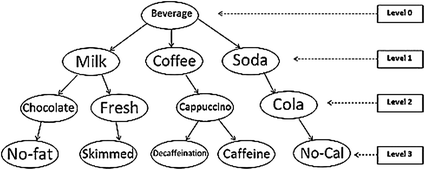!
  - Support  
    1) Uniform Support(Using uniform minimum support for all level)  
    2) Reduced Support (Using reduced minimum support at lower levels)  
    3) Group-based Support(Using item or group based support)  

- 참고
  - https://www.geeksforgeeks.org/multilevel-association-rule-in-data-mining/
  - https://www.ques10.com/p/9335/multilevel-and-multidimensional-association-rules/


### Appendix 2. Multidimensional Association Rule
1) Single – dimension rules: It contains the single distinct predicate i.e. buys Buys(X, “milk”) = buys (X,”bread”)  
2) Multi-dimensional rule: It contains more than one predicate  
3) Inter-dimension association rule: It has no repeated predicate  
Age (X,”19-25”) ^ occupation (X, “student”) = buys (X, “coke”).  
4) Hybrid dimension association rules: It contains multiple occurrence of the same predicate i.e. buys Age(X, “19-25”) ^ buys (X, “popcorn”) = buys (X, “coke”)  

- 참고
  - https://www.ques10.com/p/9335/multilevel-and-multidimensional-association-rules/
  - https://www.geeksforgeeks.org/data-mining-multidimensional-association-rule/?ref=lbp

### Appendix 3. [Computing frequent itemsets with duplicate items in transactions](https://stackoverflow.com/questions/21032817/computing-frequent-itemsets-with-duplicate-items-in-transactions)  
   - apriori 알고리즘에서 중복된 연관 규칙을 제거해야 한다고 하였는데, 중복을 반영하고자 하면 어떻게 해결할 수 있는가?  
   - 1) 데이터셋을 변경
     - (기존) Chicken Bowl을 두 번 구매했을 경우 {Chicken Bowl, Chicken Bowl}이 {Chicken Bowl}로 중복제거 됨
     - (변경 후) {Chicken Bowl, Chicken Bowl 2}의 형식으로, 이름을 바꾸어준 후 association rule mining. 이 경우 '두 번째 Chicken Bowl을 구매한 사람은 첫 번째 Chicken Bowl도 구매함'의 형식으로 rule이 생성될 것.  
   - 2) High utility itemset mining
   - 3) weighted itemset mining